In [ ]:
import pandas as pd

# Load the updated CSV file with one-hot encoded genres
goodreads = pd.read_csv('goodreads_data_with_genres.csv')

# Find columns representing genres by excluding non-genre columns
genre_columns = goodreads.columns[goodreads.columns.str.contains('Genres|Avg_Rating|Num_Ratings|URL|Book|Author|Description', regex=True) == False]

# Count of unique genres
num_genres = len(genre_columns)
print(f"Number of unique genres: {num_genres}")

# Calculate frequency of each genre
genre_counts = goodreads[genre_columns].sum().sort_values(ascending=False)

# Display top 10 most common genres
top_10_genres = genre_counts.head(10)
print("Top 10 Most Common Genres:")
print(top_10_genres)

# Display bottom 10 least common genres
bottom_10_genres = genre_counts.tail(10)
print("\nBottom 10 Least Common Genres:")
print(bottom_10_genres)



Number of unique genres: 611
Top 10 Most Common Genres:
Unnamed: 0            49995000
Fiction                   5700
Nonfiction                2330
Fantasy                   2195
Classics                  2123
Romance                   1558
Young Adult               1522
Historical Fiction        1481
Mystery                   1357
Contemporary              1302
dtype: int64

Bottom 10 Least Common Genres:
Satanism                    1
Guidebook                   1
Fat Studies                 1
Soccer                      1
Far Right                   1
Polyamory                   1
Love Inspired Historical    1
Danish                      1
Witchcraft                  1
Police                      1
dtype: int64


In [ ]:
# Filter dataset for titles with 'Nonfiction' tag
nonfiction_titles = goodreads[goodreads['Nonfiction'] == 1]

# Exclude 'Nonfiction' from genre columns
nonfiction_genre_counts = nonfiction_titles[genre_columns.difference(['Nonfiction'])].sum().sort_values(ascending=False)

# Top 10 most common genres for 'Nonfiction' titles
top_10_nonfiction = nonfiction_genre_counts.head(10)
print("\nTop 10 Most Common Genres in Nonfiction Titles (Excluding 'Nonfiction'):")
print(top_10_nonfiction)

# Bottom 10 least common genres for 'Nonfiction' titles
bottom_10_nonfiction = nonfiction_genre_counts.tail(10)
print("\nBottom 10 Least Common Genres in Nonfiction Titles (Excluding 'Nonfiction'):")
print(bottom_10_nonfiction)



Top 10 Most Common Genres in Nonfiction Titles (Excluding 'Nonfiction'):
Unnamed: 0              10942065
History                      797
Biography                    713
Self Help                    674
Psychology                   655
Memoir                       607
Philosophy                   553
Personal Development         409
Audiobook                    402
Business                     392
dtype: int64

Bottom 10 Least Common Genres in Nonfiction Titles (Excluding 'Nonfiction'):
Princesses                0
Fighters                  0
Fiction                   0
Prostitution              0
Femme Femme               0
Psychological Thriller    0
Pulp                      0
Rabbits                   0
Fantasy Romance           0
12th Century              0
dtype: int64


In [ ]:
# Filter dataset for titles without 'Nonfiction' tag
fiction_titles = goodreads[goodreads['Nonfiction'] == 0]

# Frequency count of genres for fiction-only titles
fiction_genre_counts = fiction_titles[genre_columns].sum().sort_values(ascending=False)

# Top 10 most common genres for fiction titles
top_10_fiction = fiction_genre_counts.head(10)
print("\nTop 10 Most Common Genres in Fiction Titles:")
print(top_10_fiction)

# Bottom 10 least common genres for fiction titles
bottom_10_fiction = fiction_genre_counts.tail(10)
print("\nBottom 10 Least Common Genres in Fiction Titles:")
print(bottom_10_fiction)



Top 10 Most Common Genres in Fiction Titles:
Unnamed: 0            39052935
Fiction                   5700
Fantasy                   2195
Classics                  1842
Romance                   1543
Young Adult               1522
Historical Fiction        1481
Mystery                   1332
Contemporary              1268
Novels                    1164
dtype: int64

Bottom 10 Least Common Genres in Fiction Titles:
Gender Studies        0
Cycling               0
History Of Science    0
Foodie                0
Home Economics        0
Polyamory             0
Gardening             0
Anti Racist           0
Kenya                 0
Guidebook             0
dtype: int64


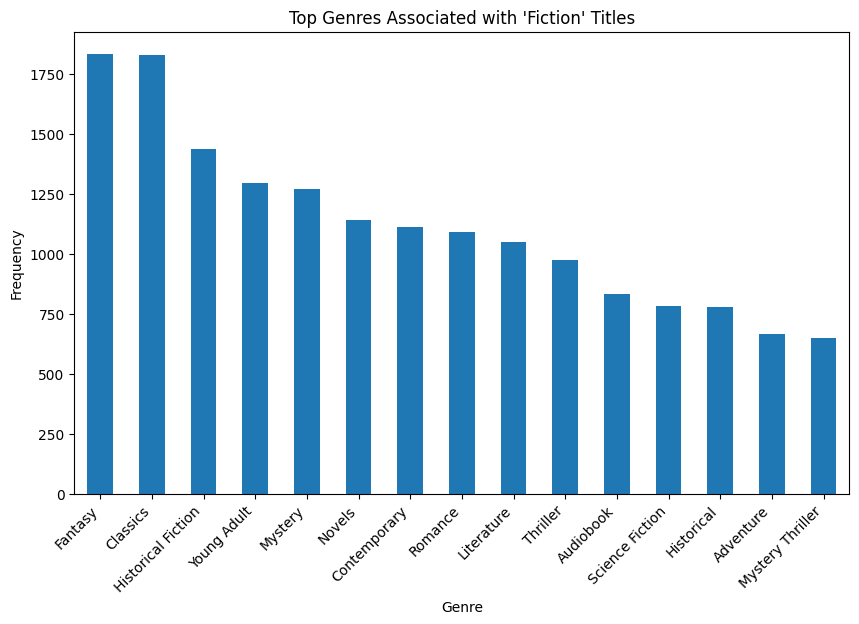

In [ ]:
# Identify only genre columns by excluding non-genre columns
genre_columns = genre_columns.difference(['Unnamed: 0', 'Fiction'])

# Filter dataset for titles with the 'Fiction' tag
fiction_titles = goodreads[goodreads['Fiction'] == 1]

# Count occurrences of other genres among fiction titles, excluding 'Fiction' and non-genre columns
fiction_genre_counts = fiction_titles[genre_columns].sum().sort_values(ascending=False)

# Select the top 15 genres associated with 'Fiction' titles
top_fiction_genres = fiction_genre_counts.head(15)

# Plotting the frequencies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_fiction_genres.plot(kind='bar')
plt.title("Top Genres Associated with 'Fiction' Titles")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


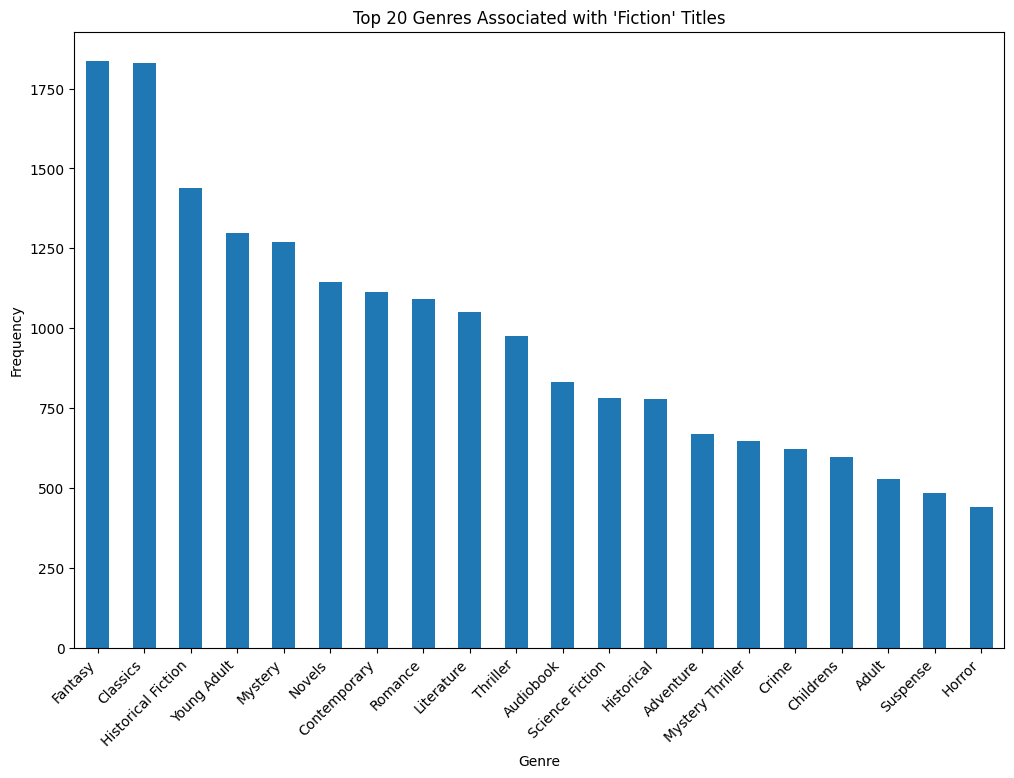

In [ ]:
# Select the top 20 genres associated with 'Fiction' titles
top_20_fiction_genres = fiction_genre_counts.head(20)

# Plotting the frequencies
plt.figure(figsize=(12, 8))
top_20_fiction_genres.plot(kind='bar')
plt.title("Top 20 Genres Associated with 'Fiction' Titles")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
# Define the top 20 genres, excluding "Audiobook" and "Mystery Thriller"
top_20_genres = ['Fantasy', 'Classics', 'Historical Fiction', 'Young Adult', 'Mystery',
                 'Novels', 'Contemporary', 'Romance', 'Literature', 'Thriller',
                 'Science Fiction', 'Historical', 'Adventure', 'Crime', 'Childrens',
                 'Adult', 'Suspense', 'Horror']

# Filter dataset for titles that have at least one of these top 20 genres
filtered_titles = goodreads[goodreads[top_20_genres].sum(axis=1) > 0]

# Generate covariance matrix for these selected genres
covariance_matrix = filtered_titles[top_20_genres].cov()

# Display the covariance matrix
covariance_matrix


,Fantasy,Classics,Historical Fiction,Young Adult,Mystery,Novels,Contemporary,Romance,Literature,Thriller,Science Fiction,Historical,Adventure,Crime,Childrens,Adult,Suspense,Horror
Fantasy,0.216045,-0.035253,-0.031134,0.058764,-0.029244,-0.032419,-0.045588,0.014990,-0.035289,-0.029667,0.048365,-0.021191,0.032300,-0.030150,0.019566,-0.006912,-0.020049,0.013643
Classics,-0.035253,0.212119,0.020978,-0.030441,-0.035996,0.031014,-0.043074,-0.041514,0.075669,-0.034906,-0.008625,-0.007994,-0.007718,-0.016022,0.018653,-0.027481,-0.022576,-0.007472
Historical Fiction,-0.031134,0.020978,0.167638,-0.010951,-0.016252,0.017992,-0.020752,-0.001842,0.019359,-0.018473,-0.018979,0.084623,-0.002807,-0.014219,-0.003443,-0.003992,-0.012598,-0.010743
Young Adult,0.058764,-0.030441,-0.010951,0.170989,-0.019416,-0.026860,0.006621,0.037682,-0.031345,-0.024660,0.006480,-0.007935,0.027768,-0.019990,0.037001,-0.007297,-0.015200,-0.006278
Mystery,-0.029244,-0.035996,-0.016252,-0.019416,0.157083,-0.017135,-0.005619,-0.021002,-0.025687,0.091725,-0.005450,-0.011768,-0.002324,0.070559,-0.011143,-0.002692,0.053178,0.012259
Novels,-0.032419,0.031014,0.017992,-0.026860,-0.017135,0.139388,0.026904,-0.020536,0.058565,-0.011060,-0.004666,-0.005994,-0.010121,-0.009780,-0.013897,-0.004169,-0.010314,-0.006308
Contemporary,-0.045588,-0.043074,-0.020752,0.006621,-0.005619,0.026904,0.152197,0.028951,-0.004577,-0.005201,-0.017289,-0.020189,-0.016861,-0.009762,-0.013288,0.029285,-0.004906,-0.006875
Romance,0.014990,-0.041514,-0.001842,0.037682,-0.021002,-0.020536,0.028951,0.173873,-0.019947,-0.023838,-0.009826,0.004595,-0.013060,-0.017202,-0.017555,0.013774,-0.006673,-0.011397
Literature,-0.035289,0.075669,0.019359,-0.031345,-0.025687,0.058565,-0.004577,-0.019947,0.134161,-0.020275,-0.011632,-0.009976,-0.011154,-0.013602,-0.011597,-0.014489,-0.011886,-0.006036
Thriller,-0.029667,-0.034906,-0.018473,-0.024660,0.091725,-0.011060,-0.005201,-0.023838,-0.020275,0.125283,0.000422,-0.015433,-0.001146,0.055569,-0.013290,-0.002172,0.055956,0.020486


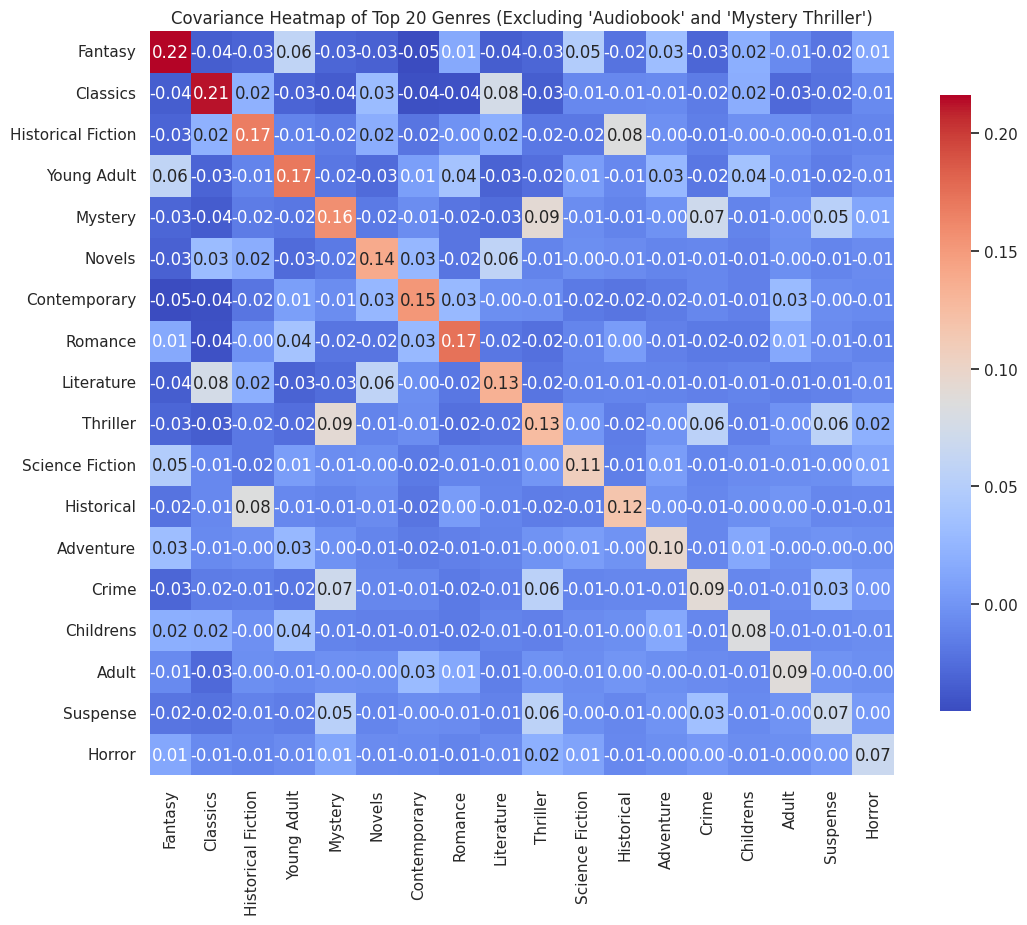

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size and style
plt.figure(figsize=(12, 10))
sns.set(style="white")

# Generate a heatmap for the covariance matrix
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title("Covariance Heatmap of Top 20 Genres (Excluding 'Audiobook' and 'Mystery Thriller')")
plt.show()


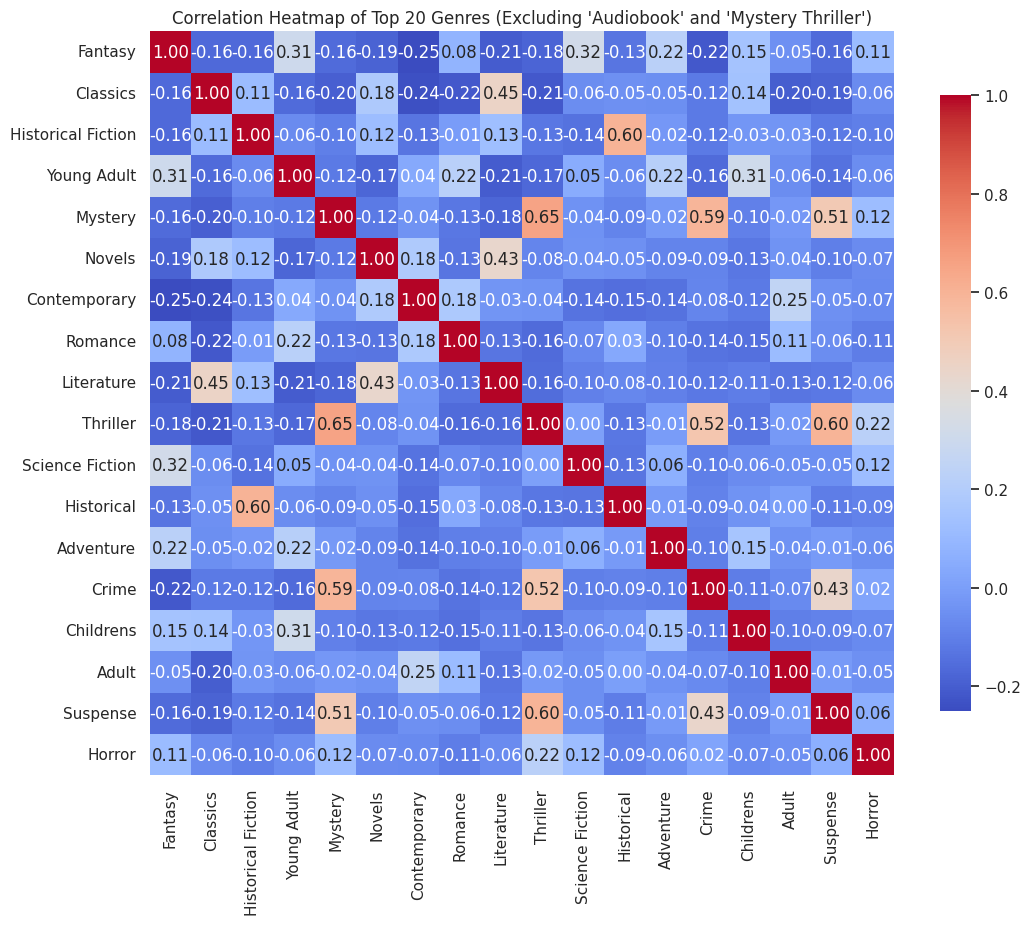

In [ ]:
# Generate a correlation matrix for the filtered genres
correlation_matrix = filtered_titles[top_20_genres].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Top 20 Genres (Excluding 'Audiobook' and 'Mystery Thriller')")
plt.show()


In [ ]:
# Define the top 20 genres to consider, excluding "Audiobook" and "Mystery Thriller"
top_20_genres = ['Fantasy', 'Classics', 'Historical Fiction', 'Young Adult', 'Mystery',
                 'Novels', 'Contemporary', 'Romance', 'Literature', 'Thriller',
                 'Science Fiction', 'Historical', 'Adventure', 'Crime', 'Childrens',
                 'Adult', 'Suspense', 'Horror']

# Filter dataset for titles that have at least one of these top 20 genres
filtered_titles = goodreads[goodreads[top_20_genres].sum(axis=1) > 0]

# Get the number of titles being considered
num_titles_considered = filtered_titles.shape[0]
print(f"Number of titles currently considered: {num_titles_considered}")


Number of titles currently considered: 6954


In [ ]:
# Count the number of titles in the filtered list that have the "Nonfiction" tag
num_nonfiction_in_filtered = filtered_titles['Nonfiction'].sum()
print(f"Number of titles with 'Nonfiction' tag in the filtered list: {num_nonfiction_in_filtered}")


Number of titles with 'Nonfiction' tag in the filtered list: 597


In [ ]:
# Exclude titles with the "Nonfiction" tag from the filtered dataset
filtered_fiction_titles = filtered_titles[filtered_titles['Nonfiction'] == 0]

# Get the number of titles being considered after exclusion
num_titles_after_exclusion = filtered_fiction_titles.shape[0]
print(f"Number of titles considered after excluding 'Nonfiction': {num_titles_after_exclusion}")


Number of titles considered after excluding 'Nonfiction': 6357


In [ ]:
# Define the top 18 genres to include in the correlation matrix
top_18_genres = ['Fantasy', 'Classics', 'Historical Fiction', 'Young Adult', 'Mystery',
                 'Novels', 'Contemporary', 'Romance', 'Literature', 'Thriller',
                 'Science Fiction', 'Historical', 'Adventure', 'Crime', 'Childrens',
                 'Adult', 'Suspense', 'Horror']

# Generate the correlation matrix for the selected genres
correlation_matrix_fiction = filtered_fiction_titles[top_18_genres].corr()

# Display the correlation matrix (optional)
correlation_matrix_fiction


,Fantasy,Classics,Historical Fiction,Young Adult,Mystery,Novels,Contemporary,Romance,Literature,Thriller,Science Fiction,Historical,Adventure,Crime,Childrens,Adult,Suspense,Horror
Fantasy,1.000000,-0.153900,-0.203784,0.281804,-0.190982,-0.222347,-0.284673,0.048786,-0.232325,-0.210868,0.303308,-0.129225,0.231780,-0.230447,0.138825,-0.052998,-0.186385,0.099791
Classics,-0.153900,1.000000,0.138520,-0.152779,-0.192526,0.209551,-0.234657,-0.211986,0.487829,-0.214237,-0.047849,-0.017956,-0.035261,-0.101398,0.162416,-0.191441,-0.187659,-0.055878
Historical Fiction,-0.203784,0.138520,1.000000,-0.092945,-0.122817,0.097970,-0.151243,-0.035131,0.123006,-0.149105,-0.163170,0.668714,-0.027437,-0.122154,-0.039702,-0.034338,-0.132708,-0.116359
Young Adult,0.281804,-0.152779,-0.092945,1.000000,-0.142126,-0.200815,0.025290,0.200832,-0.226715,-0.191573,0.030066,-0.047941,0.223047,-0.170220,0.309565,-0.062656,-0.156099,-0.073028
Mystery,-0.190982,-0.192526,-0.122817,-0.142126,1.000000,-0.135817,-0.049030,-0.149037,-0.192382,0.654405,-0.056990,-0.084696,-0.020587,0.604997,-0.106913,-0.022049,0.509067,0.111702
Novels,-0.222347,0.209551,0.097970,-0.200815,-0.135817,1.000000,0.175910,-0.156092,0.434193,-0.101342,-0.054781,-0.039823,-0.095078,-0.091804,-0.140709,-0.039365,-0.118238,-0.077481
Contemporary,-0.284673,-0.234657,-0.151243,0.025290,-0.049030,0.175910,1.000000,0.167320,-0.038010,-0.050226,-0.151378,-0.149739,-0.147923,-0.084186,-0.127116,0.257457,-0.058000,-0.078136
Romance,0.048786,-0.211986,-0.035131,0.200832,-0.149037,-0.156092,0.167320,1.000000,-0.145535,-0.182994,-0.090895,0.050463,-0.108899,-0.143915,-0.159093,0.117573,-0.074963,-0.119995
Literature,-0.232325,0.487829,0.123006,-0.226715,-0.192382,0.434193,-0.038010,-0.145535,1.000000,-0.169507,-0.108397,-0.069182,-0.101068,-0.128623,-0.116203,-0.136667,-0.132773,-0.071026
Thriller,-0.210868,-0.214237,-0.149105,-0.191573,0.654405,-0.101342,-0.050226,-0.182994,-0.169507,1.000000,-0.009359,-0.126465,-0.012815,0.543304,-0.140190,-0.021547,0.598506,0.215786


In [ ]:
# Filter dataset for titles with the "Fiction" tag
fiction_titles = goodreads[goodreads['Fiction'] == 1]

# List of genre columns excluding "Fiction"
genre_columns_excluding_fiction = genre_columns.difference(['Fiction'])

# Count the frequency of each genre in the filtered dataset
fiction_genre_counts = fiction_titles[genre_columns_excluding_fiction].sum().sort_values(ascending=False)

# Get the top 20 most represented genres (excluding "Fiction")
top_20_fiction_genres = fiction_genre_counts.head(20)
print("Top 20 Genres Represented in Fiction Titles (Excluding 'Fiction'):")
print(top_20_fiction_genres)



Top 20 Genres Represented in Fiction Titles (Excluding 'Fiction'):
Fantasy               1836
Classics              1829
Historical Fiction    1439
Young Adult           1298
Mystery               1270
Novels                1144
Contemporary          1112
Romance               1092
Literature            1051
Thriller               975
Audiobook              833
Science Fiction        782
Historical             778
Adventure              668
Mystery Thriller       648
Crime                  622
Childrens              596
Adult                  529
Suspense               485
Horror                 441
dtype: int64


Number of titles considered: 5581


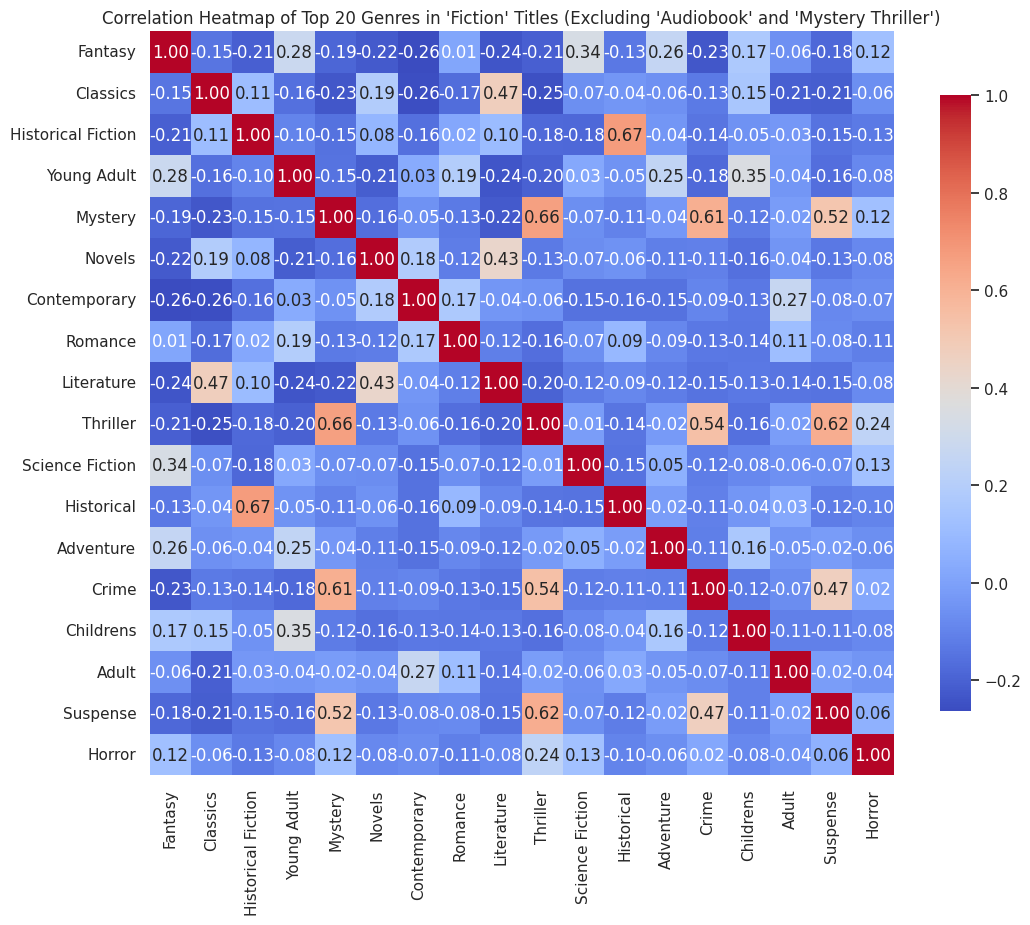

In [ ]:
# Define the top 20 genres excluding 'Audiobook' and 'Mystery Thriller'
top_20_genres_excluding_audiobook_mysterythriller = [
    'Fantasy', 'Classics', 'Historical Fiction', 'Young Adult', 'Mystery',
    'Novels', 'Contemporary', 'Romance', 'Literature', 'Thriller',
    'Science Fiction', 'Historical', 'Adventure', 'Crime', 'Childrens',
    'Adult', 'Suspense', 'Horror'
]

# Filter for titles tagged with "Fiction" and at least one of the other top 18 genres
filtered_fiction_titles = goodreads[
    (goodreads['Fiction'] == 1) &
    (goodreads[top_20_genres_excluding_audiobook_mysterythriller].sum(axis=1) > 0)
]

# Count the number of titles we're now considering
num_titles_considered = filtered_fiction_titles.shape[0]
print(f"Number of titles considered: {num_titles_considered}")

# Generate the correlation matrix for the selected top 18 genres
correlation_matrix_fiction = filtered_fiction_titles[top_20_genres_excluding_audiobook_mysterythriller].corr()

# Plotting the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_fiction, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Top 20 Genres in 'Fiction' Titles (Excluding 'Audiobook' and 'Mystery Thriller')")
plt.show()


Number of titles considered: 5581


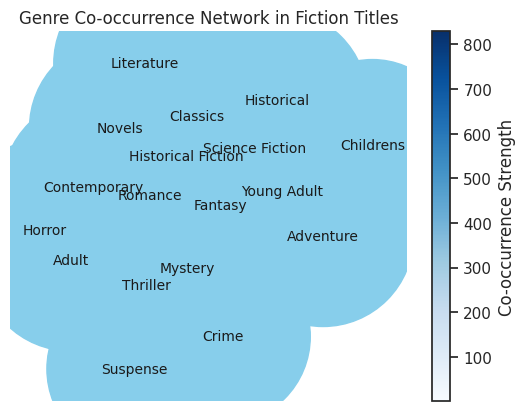

In [ ]:
# Define the top 18 genres to include in the network graph, excluding 'Audiobook' and 'Mystery Thriller'
top_18_genres = [
    'Fantasy', 'Classics', 'Historical Fiction', 'Young Adult', 'Mystery',
    'Novels', 'Contemporary', 'Romance', 'Literature', 'Thriller',
    'Science Fiction', 'Historical', 'Adventure', 'Crime', 'Childrens',
    'Adult', 'Suspense', 'Horror'
]

# Filter for titles tagged as 'Fiction' and that have at least one of the top 18 genres
filtered_fiction_titles = goodreads[
    (goodreads['Fiction'] == 1) &
    (goodreads[top_18_genres].sum(axis=1) > 0)
]

# Check the number of titles we're working with after filtering
num_titles_considered = filtered_fiction_titles.shape[0]
print(f"Number of titles considered: {num_titles_considered}")

# Calculate the co-occurrence matrix by taking a dot product of the genre columns
co_occurrence_matrix = filtered_fiction_titles[top_18_genres].T.dot(filtered_fiction_titles[top_18_genres])

# Remove self-co-occurrences (diagonal elements)
for genre in top_18_genres:
    co_occurrence_matrix.loc[genre, genre] = 0

import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the co-occurrence matrix
G = nx.Graph()

# Add edges to the graph based on the co-occurrence strength
for genre1 in top_18_genres:
    for genre2 in top_18_genres:
        if co_occurrence_matrix.loc[genre1, genre2] > 0:
            # Add an edge with weight equal to the co-occurrence count
            G.add_edge(genre1, genre2, weight=co_occurrence_matrix.loc[genre1, genre2])

# Position nodes using the spring layout for better visualization
pos = nx.spring_layout(G, seed=42)

# Draw nodes with size based on the degree (number of connections) of each node
node_sizes = [1000 * nx.degree(G, node) for node in G]

# Draw edges with thickness based on weight (co-occurrence strength)
edges = nx.draw_networkx_edges(
    G, pos,
    edge_color=[G[u][v]['weight'] for u, v in G.edges()],
    width=[0.1 * G[u][v]['weight'] for u, v in G.edges()],
    edge_cmap=plt.cm.Blues
)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Colorbar for edge weights
plt.colorbar(edges, label="Co-occurrence Strength")
plt.title("Genre Co-occurrence Network in Fiction Titles")
plt.axis("off")  # Turn off axis for cleaner look
plt.show()


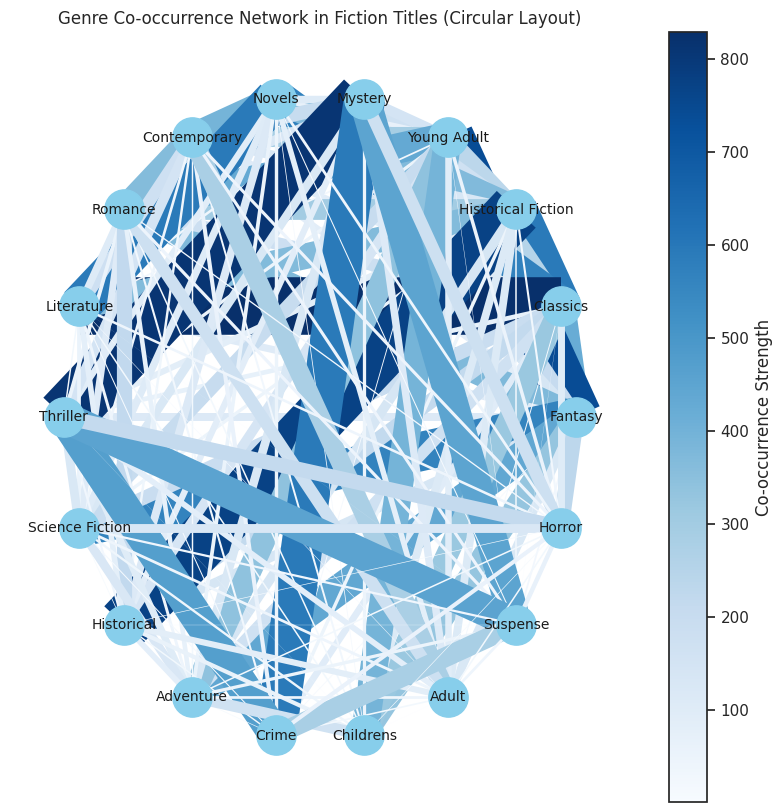

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define the 18 genres we’re considering
selected_genres = [
    'Fantasy', 'Classics', 'Historical Fiction', 'Young Adult', 'Mystery',
    'Novels', 'Contemporary', 'Romance', 'Literature', 'Thriller',
    'Science Fiction', 'Historical', 'Adventure', 'Crime', 'Childrens',
    'Adult', 'Suspense', 'Horror'
]

# Ensure we're working with the filtered dataset of 'Fiction' titles with these genres
filtered_fiction_titles = goodreads[
    (goodreads['Fiction'] == 1) &
    (goodreads[selected_genres].sum(axis=1) > 0)
]

# Calculate the co-occurrence matrix for the selected genres
co_occurrence_matrix = filtered_fiction_titles[selected_genres].T.dot(filtered_fiction_titles[selected_genres])

# Remove self-co-occurrences
for genre in selected_genres:
    co_occurrence_matrix.loc[genre, genre] = 0

# Create the graph
G = nx.Graph()

# Add edges with weights based on co-occurrence values
for genre1 in selected_genres:
    for genre2 in selected_genres:
        if co_occurrence_matrix.loc[genre1, genre2] > 0:
            # Add edge with weight (thickness based on co-occurrence strength)
            G.add_edge(genre1, genre2, weight=co_occurrence_matrix.loc[genre1, genre2])

# Set up the circular layout
pos = nx.circular_layout(G)

# Draw the nodes
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=800, node_color="skyblue")

# Draw edges with varying thickness based on co-occurrence strength
edges = nx.draw_networkx_edges(
    G, pos,
    width=[0.05 * G[u][v]['weight'] for u, v in G.edges()],
    edge_color=[G[u][v]['weight'] for u, v in G.edges()],
    edge_cmap=plt.cm.Blues
)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

# Add a colorbar to show co-occurrence strength
plt.colorbar(edges, label="Co-occurrence Strength")
plt.title("Genre Co-occurrence Network in Fiction Titles (Circular Layout)")
plt.axis("off")  # Hide the axes
plt.show()


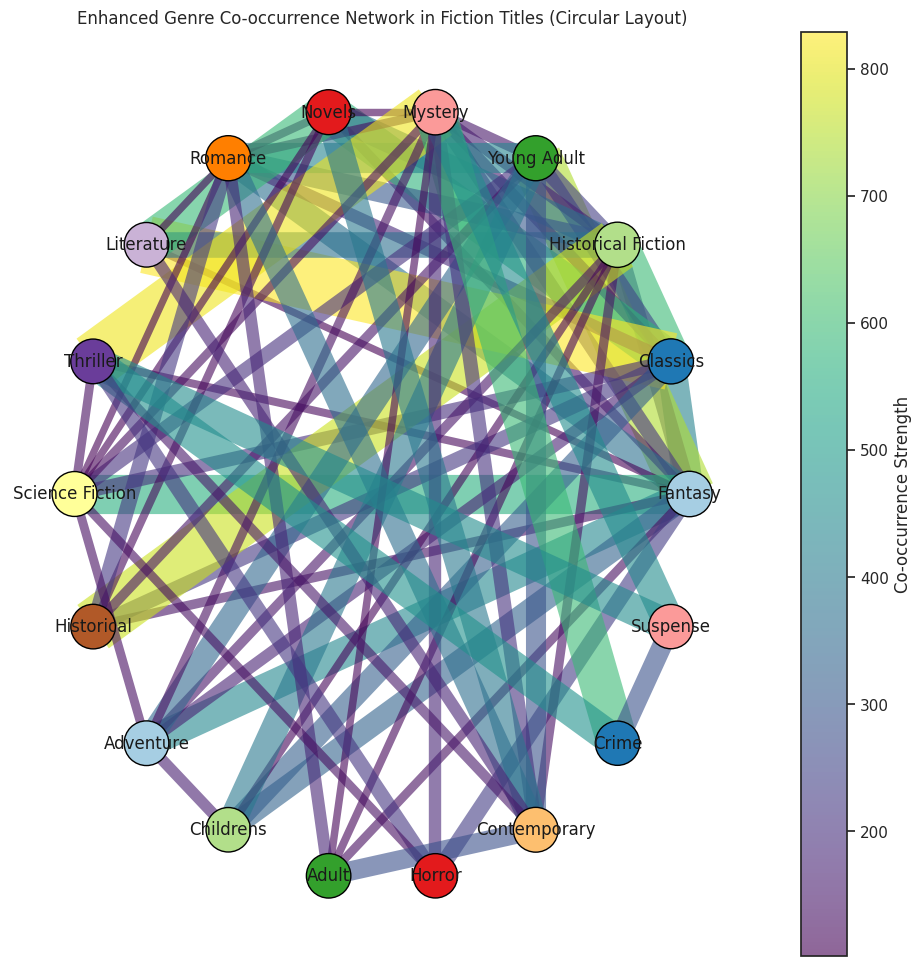

In [ ]:
import seaborn as sns

# Set up a color palette for the nodes
palette = sns.color_palette("Paired", n_colors=len(selected_genres))
node_colors = {genre: palette[i] for i, genre in enumerate(selected_genres)}

# Create the graph
G = nx.Graph()

# Add edges with weights based on co-occurrence values, filtering for stronger connections
threshold = 100  # Set a threshold to include only significant connections
for genre1 in selected_genres:
    for genre2 in selected_genres:
        weight = co_occurrence_matrix.loc[genre1, genre2]
        if weight > threshold:
            G.add_edge(genre1, genre2, weight=weight)

# Circular layout for genres
pos = nx.circular_layout(G)

# Draw nodes with colors and sizes based on connectivity (degree)
node_sizes = [1000 + 5 * G.degree(node) for node in G]
node_colors_mapped = [node_colors[node] for node in G]

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors_mapped, edgecolors="black")

# Draw edges with varying thickness, transparency, and color intensity
edges = nx.draw_networkx_edges(
    G, pos,
    width=[0.05 * G[u][v]['weight'] for u, v in G.edges()],
    alpha=0.6,  # Set transparency to reduce clutter
    edge_color=[G[u][v]['weight'] for u, v in G.edges()],
    edge_cmap=plt.cm.viridis  # More colorful colormap
)

# Draw labels with larger font size for clarity
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

# Colorbar for edge weights to show co-occurrence strength
plt.colorbar(edges, label="Co-occurrence Strength")
plt.title("Enhanced Genre Co-occurrence Network in Fiction Titles (Circular Layout)")
plt.axis("off")  # Hide axes
plt.show()


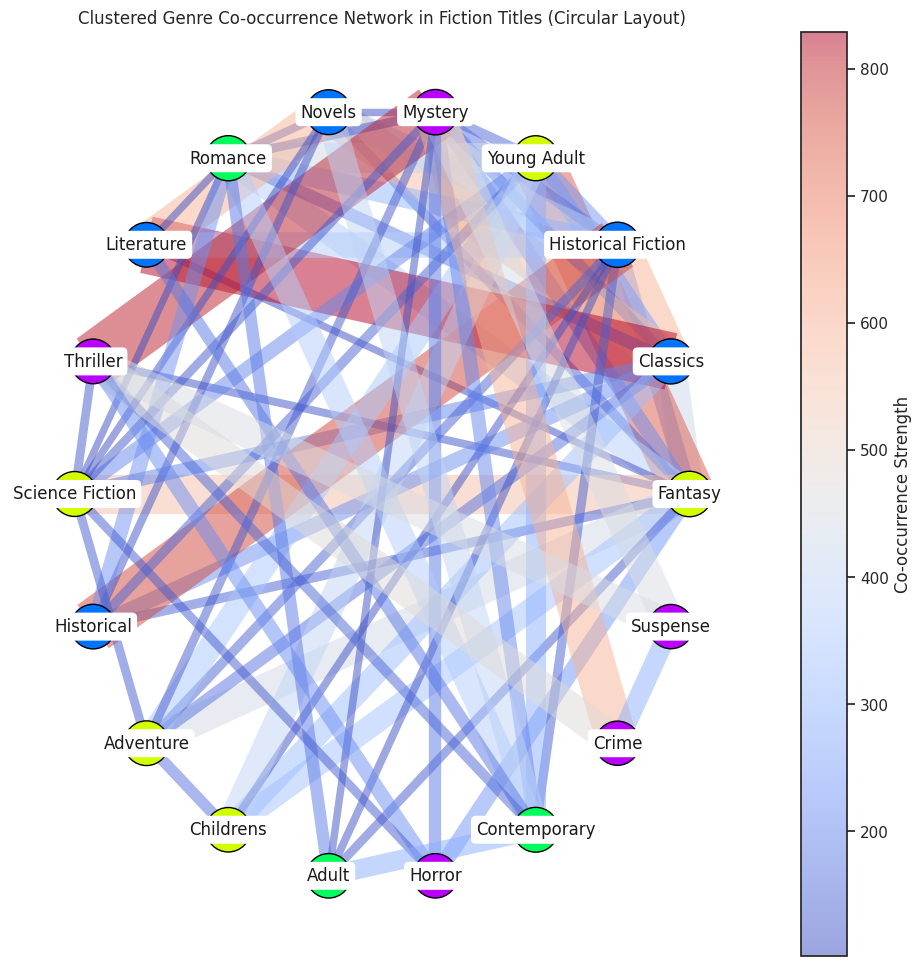

In [ ]:
# Import the correct module for community detection
from community import community_louvain  # Ensure you have installed `python-louvain`
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Community detection to find clusters
partition = community_louvain.best_partition(G)

# Define a color map for clusters
unique_clusters = list(set(partition.values()))
num_clusters = len(unique_clusters)
cluster_palette = sns.color_palette("hsv", num_clusters)
cluster_colors = {genre: cluster_palette[partition[genre]] for genre in G.nodes}

# Set up circular layout with padding for labels
pos = nx.circular_layout(G)

plt.figure(figsize=(12, 12))

# Draw nodes with cluster-based colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=[cluster_colors[node] for node in G], edgecolors="black")

# Draw edges with varying thickness and transparency to reduce clutter
edges = nx.draw_networkx_edges(
    G, pos,
    width=[0.05 * G[u][v]['weight'] for u, v in G.edges()],
    alpha=0.5,  # Increased transparency for a cleaner look
    edge_color=[G[u][v]['weight'] for u, v in G.edges()],
    edge_cmap=plt.cm.coolwarm  # Distinct colormap for edges
)

# Draw labels with padding adjustments
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", bbox=dict(facecolor="white", edgecolor='none', boxstyle="round,pad=0.3"))

# Colorbar for edge weights to show co-occurrence strength
plt.colorbar(edges, label="Co-occurrence Strength")
plt.title("Clustered Genre Co-occurrence Network in Fiction Titles (Circular Layout)")
plt.axis("off")  # Hide axes for clarity
plt.show()


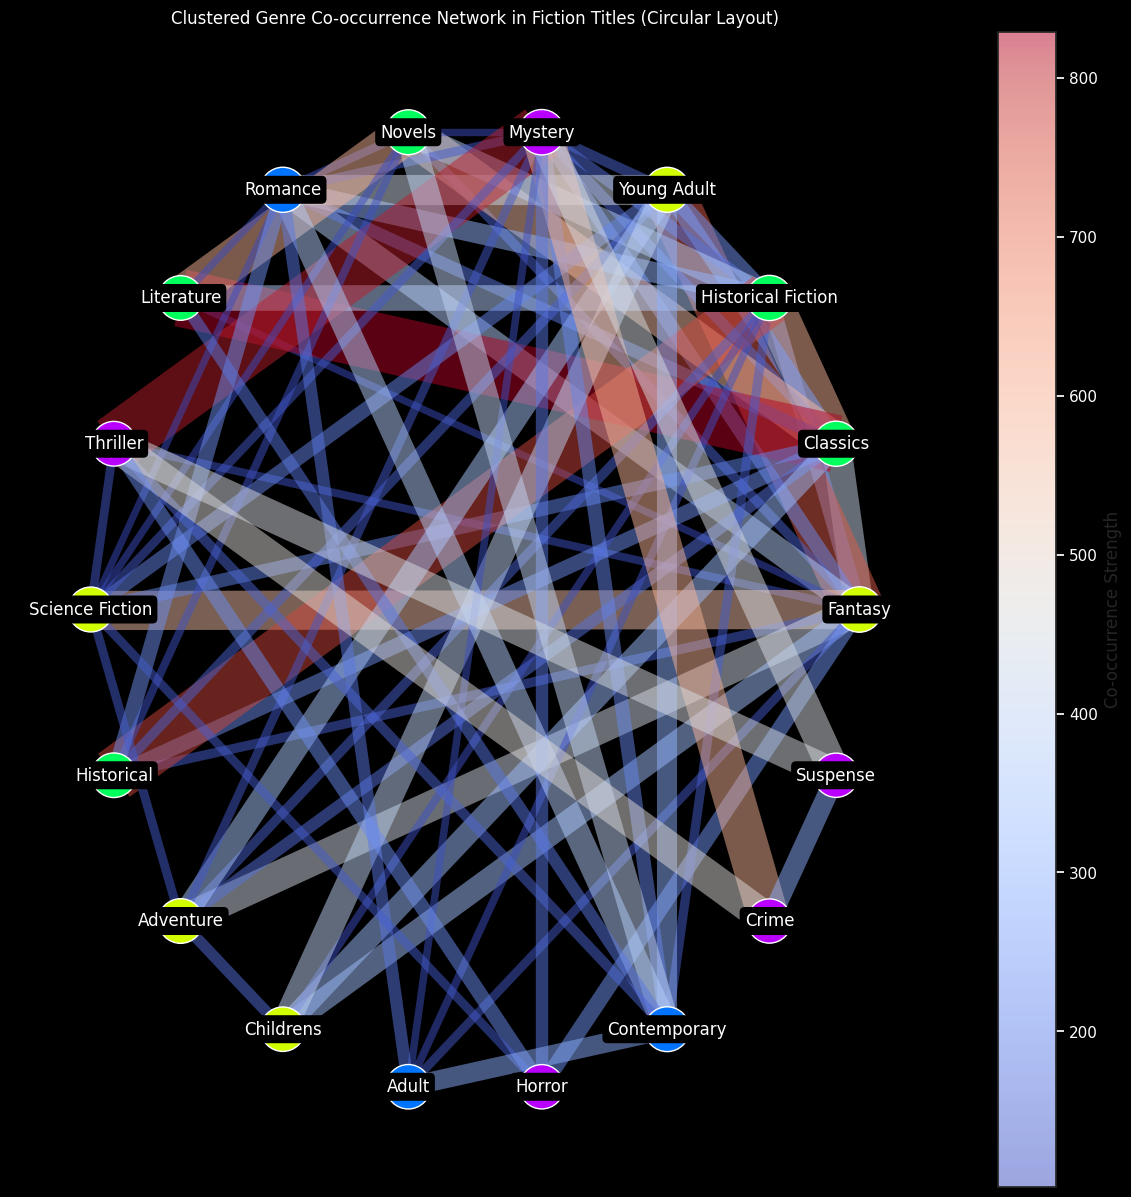

In [ ]:
# Import the correct module for community detection
from community import community_louvain  # Ensure you have installed `python-louvain`
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Community detection to find clusters
partition = community_louvain.best_partition(G)

# Define a color map for clusters
unique_clusters = list(set(partition.values()))
num_clusters = len(unique_clusters)
cluster_palette = sns.color_palette("hsv", num_clusters)
cluster_colors = {genre: cluster_palette[partition[genre]] for genre in G.nodes}

# Set up circular layout with padding for labels
pos = nx.circular_layout(G)

# Create a larger figure with a black background
plt.figure(figsize=(15, 15), facecolor='black')
plt.gca().set_facecolor('black')

# Draw nodes with cluster-based colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=[cluster_colors[node] for node in G], edgecolors="white")

# Draw edges with varying thickness and lighter colors for visibility
edges = nx.draw_networkx_edges(
    G, pos,
    width=[0.05 * G[u][v]['weight'] for u, v in G.edges()],
    alpha=0.5,  # Set transparency for readability
    edge_color=[G[u][v]['weight'] for u, v in G.edges()],
    edge_cmap=plt.cm.coolwarm  # Coolwarm colormap works well on dark backgrounds
)

# Draw labels with white text for visibility
nx.draw_networkx_labels(G, pos, font_size=12, font_color="white", font_family="sans-serif", bbox=dict(facecolor="black", edgecolor='none', boxstyle="round,pad=0.3"))

# Colorbar with adjustments for readability on a black background
colorbar = plt.colorbar(edges, label="Co-occurrence Strength")
colorbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(colorbar.ax.axes, 'yticklabels'), color='white')

plt.title("Clustered Genre Co-occurrence Network in Fiction Titles (Circular Layout)", color="white")
plt.axis("off")  # Hide axes for clarity
plt.show()


<ipython-input-24-f5da7de0433f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=palette)


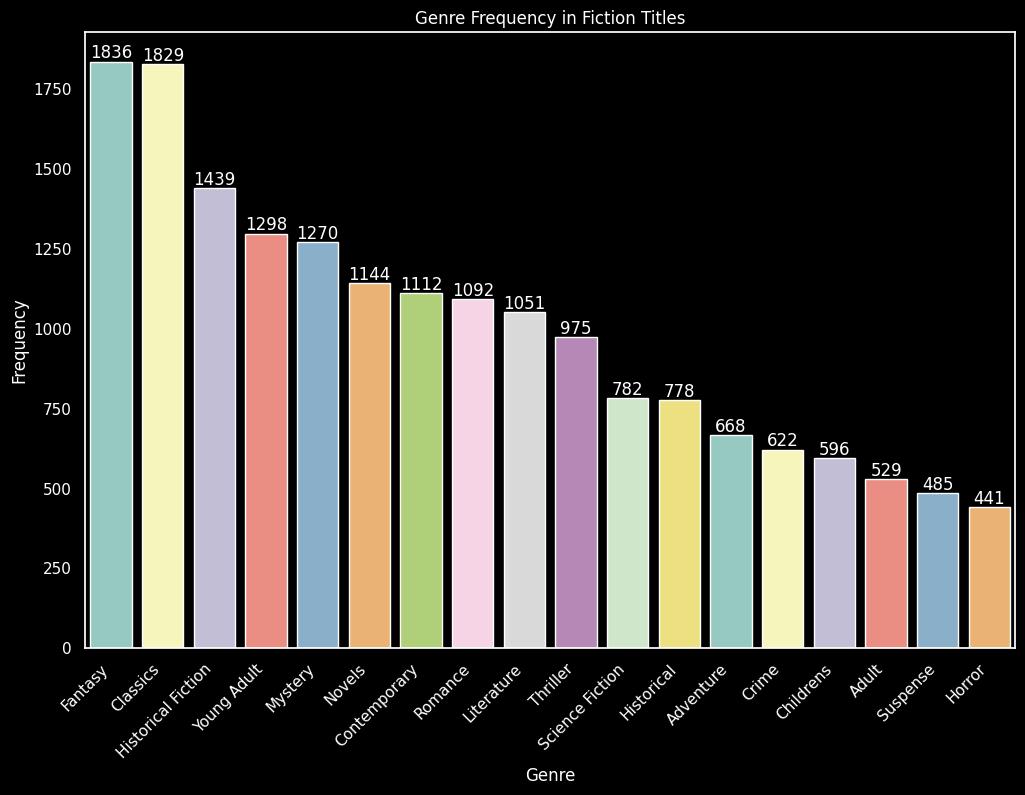

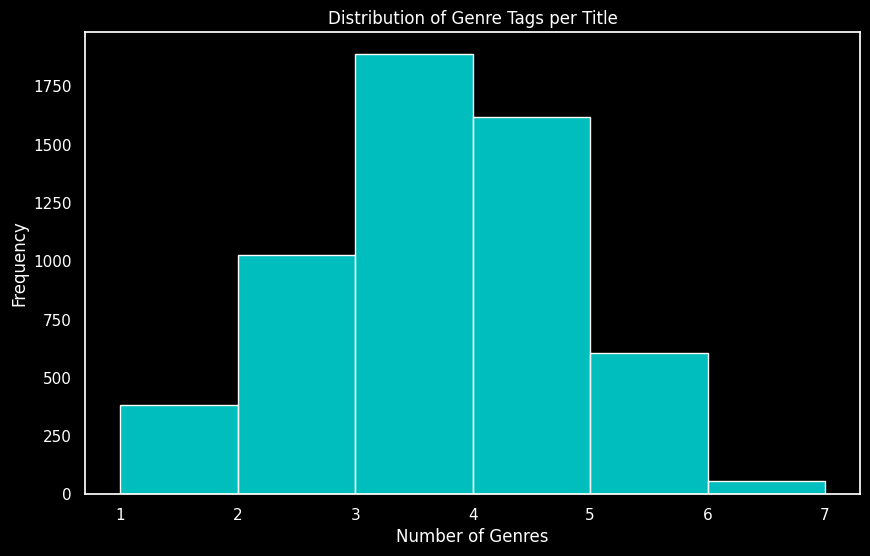

<ipython-input-24-f5da7de0433f>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(average_genre_tags.keys()), y=list(average_genre_tags.values()), palette=palette)


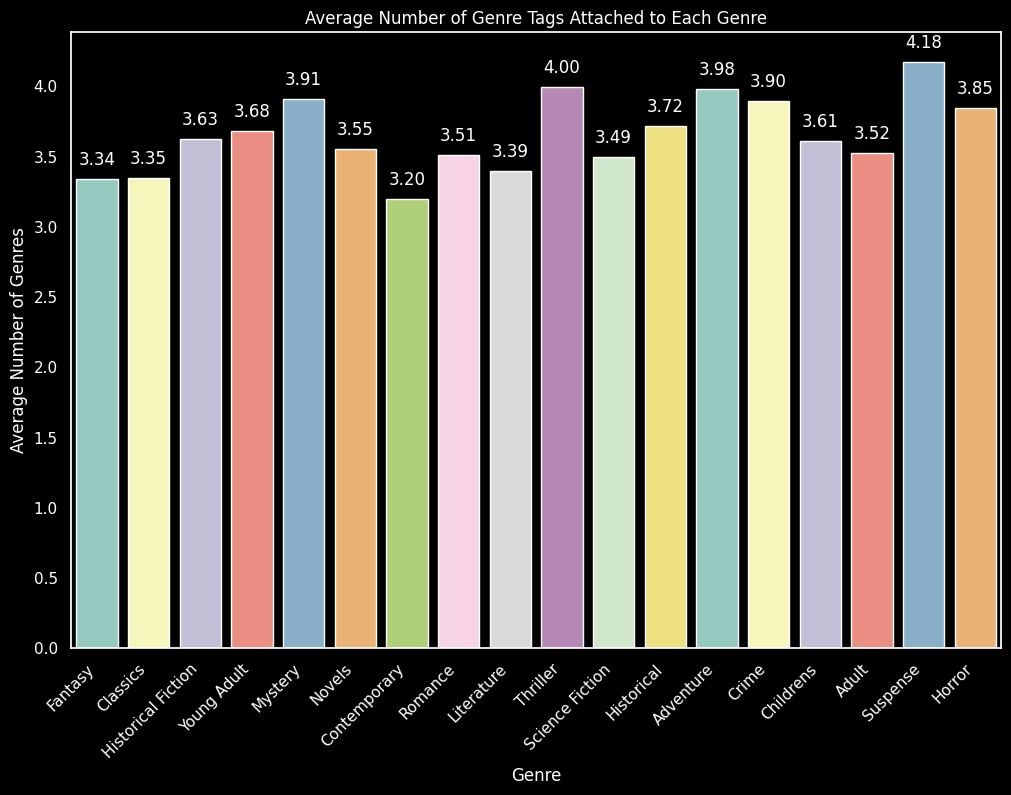

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style and color palette for cool aesthetics on a black background
plt.style.use('dark_background')
palette = sns.color_palette("Set3", n_colors=18)

# 1. Bar graph of genre frequencies within the dataset we're considering
genre_counts = filtered_fiction_titles[selected_genres].sum()
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette=palette)
plt.title("Genre Frequency in Fiction Titles", color="white")
plt.xlabel("Genre", color="white")
plt.ylabel("Frequency", color="white")
plt.xticks(rotation=45, ha='right', color="white")
plt.yticks(color="white")
for i, v in enumerate(genre_counts.values):
    plt.text(i, v + 10, str(v), ha='center', color="white")  # Add frequency labels
plt.show()

# 2. Distribution of the number of genre tags per title
# Calculate the count of genres per title
genre_per_title_count = filtered_fiction_titles[selected_genres].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(genre_per_title_count, bins=range(1, genre_per_title_count.max() + 2), color="cyan", edgecolor="white")
plt.title("Distribution of Genre Tags per Title", color="white")
plt.xlabel("Number of Genres", color="white")
plt.ylabel("Frequency", color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.show()

# 3. Average number of genres associated with each genre type
# Calculate the average number of genres per title for each genre
average_genre_tags = {}
for genre in selected_genres:
    # Filter titles with this genre and calculate average number of genres for them
    titles_with_genre = filtered_fiction_titles[filtered_fiction_titles[genre] == 1]
    average_genre_tags[genre] = titles_with_genre[selected_genres].sum(axis=1).mean()

# Create the bar graph for average number of genres per genre
plt.figure(figsize=(12, 8))
sns.barplot(x=list(average_genre_tags.keys()), y=list(average_genre_tags.values()), palette=palette)
plt.title("Average Number of Genre Tags Attached to Each Genre", color="white")
plt.xlabel("Genre", color="white")
plt.ylabel("Average Number of Genres", color="white")
plt.xticks(rotation=45, ha='right', color="white")
plt.yticks(color="white")
for i, v in enumerate(average_genre_tags.values()):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', color="white")  # Add average labels
plt.show()
